In [151]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [152]:
#Importando base de dados

df = pd.read_csv('output.csv')
df

,brand,model,transmission,age,fuel,engine,km,owner,price,location,mileage,power,seats,type
0,mahindra,thar,manual,4.0,diesel,2184.0,11003.0,1.0,1231000.0,NaN,NaN,NaN,NaN,NaN
1,hyundai,verna,manual,6.0,petrol,1591.0,66936.0,1.0,786000.0,NaN,NaN,NaN,NaN,NaN
2,tata,harrier,manual,2.0,diesel,1956.0,27990.0,1.0,1489000.0,NaN,NaN,NaN,NaN,NaN
3,honda,city,automatic,1.0,petrol,1498.0,5061.0,1.0,1227000.0,NaN,NaN,NaN,NaN,NaN
4,ford,ecosport,manual,3.0,diesel,1498.0,23480.0,1.0,887000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32195,datsun,redi go,manual,6.0,petrol,NaN,11500.0,1.0,292000.0,maharashtra,NaN,NaN,5.0,hatchback
32196,toyota,yaris,manual,6.0,petrol,NaN,73393.0,2.0,534000.0,karnataka,NaN,NaN,5.0,sedan
32197,volkswagen,ameo,manual,8.0,petrol,NaN,83810.0,2.0,424000.0,uttar pradesh,NaN,NaN,5.0,sedan
32198,hyundai,grand i10 nios,automatic,5.0,petrol,NaN,39162.0,1.0,685000.0,chandigarh,NaN,NaN,5.0,hatchback


## Limpeza dos dados

In [153]:
#Informações dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32200 entries, 0 to 32199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32199 non-null  object 
 1   model         32199 non-null  object 
 2   transmission  32200 non-null  object 
 3   age           32199 non-null  float64
 4   fuel          32200 non-null  object 
 5   engine        24068 non-null  float64
 6   km            32200 non-null  float64
 7   owner         16819 non-null  float64
 8   price         32200 non-null  float64
 9   location      13801 non-null  object 
 10  mileage       21380 non-null  float64
 11  power         21273 non-null  float64
 12  seats         29353 non-null  float64
 13  type          8015 non-null   object 
dtypes: float64(8), object(6)
memory usage: 3.4+ MB


In [154]:
#Descrição dos dados
df.describe()

,age,engine,km,owner,price,mileage,power,seats
count,32199.000000,24068.000000,3.220000e+04,16819.000000,3.220000e+04,21380.000000,21273.000000,29353.000000
mean,7.120625,1489.872569,5.495269e+04,1.263452,7.347001e+05,19.305532,103.497647,5.233537
std,3.485577,520.916872,5.577145e+04,0.490463,7.037702e+05,4.418605,45.002260,0.707639
min,0.000000,72.000000,0.000000e+00,1.000000,4.000000e+04,0.000000,34.200000,0.000000
25%,4.000000,1197.000000,3.020825e+04,1.000000,3.850000e+05,16.500000,74.000000,5.000000
50%,7.000000,1248.000000,5.000000e+04,1.000000,5.510000e+05,19.010000,88.500000,5.000000
75%,9.000000,1591.000000,7.102075e+04,1.000000,7.920000e+05,22.320000,120.000000,5.000000
max,29.000000,5998.000000,6.500000e+06,4.000000,7.066000e+06,46.620600,600.000000,10.000000


In [155]:
#Conferindo se há valores NULL e NaN
df.isna().sum()

brand               1
model               1
transmission        0
age                 1
fuel                0
engine           8132
km                  0
owner           15381
price               0
location        18399
mileage         10820
power           10927
seats            2847
type            24185
dtype: int64

In [156]:
#Excluindo colunas com grandes volumes de dados NULL e NaN
df = df.drop(columns=['engine','owner','location','mileage','power','seats','type'])
df

,brand,model,transmission,age,fuel,km,price
0,mahindra,thar,manual,4.0,diesel,11003.0,1231000.0
1,hyundai,verna,manual,6.0,petrol,66936.0,786000.0
2,tata,harrier,manual,2.0,diesel,27990.0,1489000.0
3,honda,city,automatic,1.0,petrol,5061.0,1227000.0
4,ford,ecosport,manual,3.0,diesel,23480.0,887000.0
...,...,...,...,...,...,...,...
32195,datsun,redi go,manual,6.0,petrol,11500.0,292000.0
32196,toyota,yaris,manual,6.0,petrol,73393.0,534000.0
32197,volkswagen,ameo,manual,8.0,petrol,83810.0,424000.0
32198,hyundai,grand i10 nios,automatic,5.0,petrol,39162.0,685000.0


In [157]:
#Excluindo dados NULL e NaN
df = df.dropna()

In [158]:
#Confirmando se os dados NULL e NaN foram apagados
df.isna().sum()

brand           0
model           0
transmission    0
age             0
fuel            0
km              0
price           0
dtype: int64

## Análises

In [159]:
#Contando ocorrência de cada marca na base de dados, e mostrando as 15 marcas mais vendidas

brand = df['brand'].value_counts()
print(f'Total de marcas: {len(brand)}\n')
print(f'As 15 mais vendidas\n{brand[:15]}')

Total de marcas: 35

As 15 mais vendidas
brand
maruti           10561
hyundai           6757
honda             3198
mahindra          1550
toyota            1413
ford              1329
renault           1233
tata              1206
volkswagen        1170
bmw                694
mercedes-benz      641
skoda              614
audi               427
datsun             327
kia                213
Name: count, dtype: int64


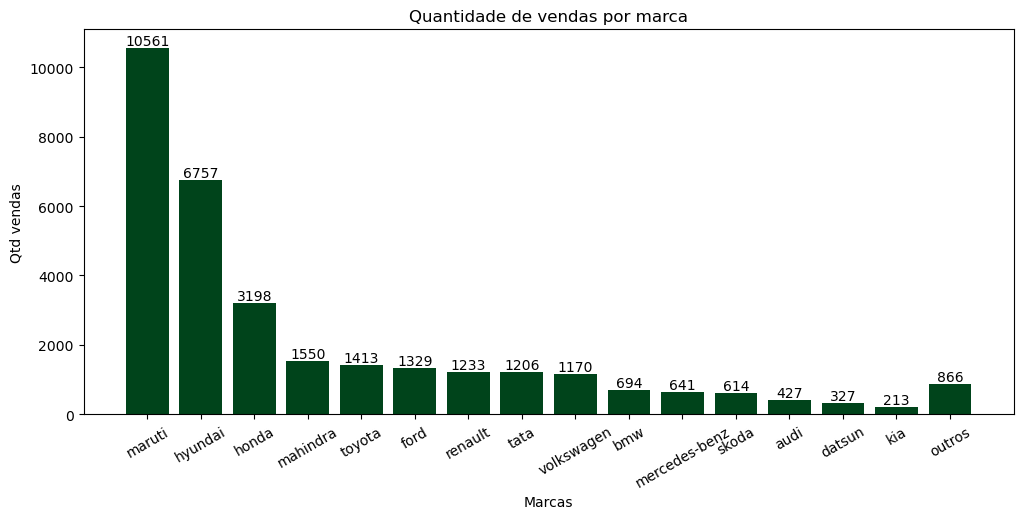

In [160]:
#Vizualisando marcas mais vendidas

brand2 = brand[:15]
outros = brand[15:].sum()
brand2['outros']=outros

fig, ax = plt.subplots(figsize=(12,5))
bar_container = ax.bar(brand2.index,brand2.values, color='#00441b')
ax.set_title('Quantidade de vendas por marca',fontsize=12)
ax.set_xlabel('Marcas',fontsize=10)
ax.set_ylabel('Qtd vendas',fontsize=10)
ax.bar_label(bar_container)
ax.tick_params(axis='x', rotation=30)
plt.savefig('Qtd_de_vendas_por_marca.png')
plt.show()

In [161]:
#Comparando volume de vendas para cada tipo de transmissão

transmission = df['transmission'].value_counts()
transmission2 = round(df['transmission'].value_counts()/len(df['transmission']),2)
print(f'{transmission}\n')
print(f'{transmission2}')

transmission
manual       24904
automatic     7295
Name: count, dtype: int64

transmission
manual       0.77
automatic    0.23
Name: count, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

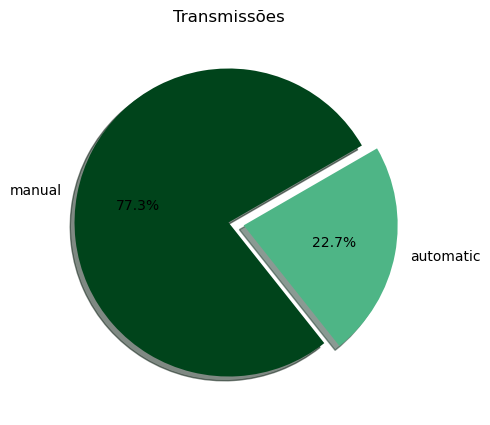

In [162]:
#Vizualisando volume de vendas para cada tipo de transmissão
sizes = transmission.values
labels = transmission.index

fig, ax = plt.subplots(figsize=(6,5))
ax.pie(sizes,explode =(0,0.1), labels=labels, autopct='%1.1f%%',shadow=True, startangle=30,
                        colors=['#00441b','#4eb586'])
ax.set_title('Transmissões')
plt.savefig('Transmissões.png')
plt.show

In [163]:
#Comparando volumes de vendas para cada "Age", mostrando os 15 mais vendidos
age = df['age'].astype({'age':str}).value_counts()
age[:15]

age
6.0     3727
5.0     3563
7.0     3542
8.0     3165
4.0     3148
3.0     2912
9.0     2554
10.0    2189
2.0     1702
11.0    1658
12.0    1221
13.0     963
14.0     647
1.0      333
15.0     288
Name: count, dtype: int64

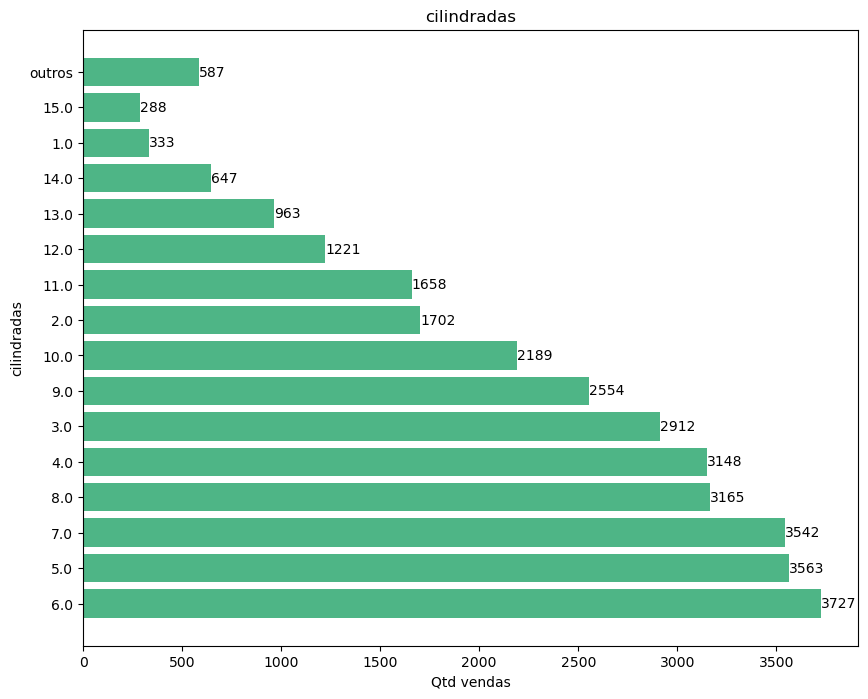

In [164]:
#Vizualisando vendas por cilindradas

age2 = age[:15]
outros = age[15:].sum()
age2['outros'] = outros

fig, ax = plt.subplots(figsize=(10,8))
bar_container = ax.barh(age2.index,age2.values, color='#4eb586')
ax.set_xlabel('Qtd vendas',fontsize=10)
ax.set_ylabel('cilindradas',fontsize=10)
ax.set_title('cilindradas',fontsize=12)
ax.bar_label(bar_container)
plt.savefig('Qtd_de_vendas_por_cilindradas.png')
plt.show()


In [165]:
#Comparando combustíveis presentes nos carros

fuel = df['fuel'].value_counts()
fuel2 = fuel[:2]
fuel2['outros'] = fuel[2:].sum()
print(f'{fuel2}\n')


fuel
petrol    19154
diesel    11978
outros     1067
Name: count, dtype: int64



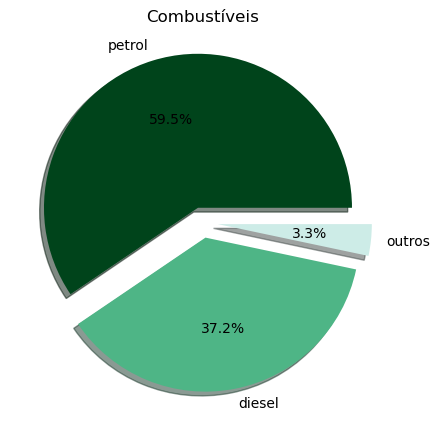

In [166]:
#Vizualisando volume de vendas com cada tipo de combustível

sizes = fuel2.values
labels = fuel2.index

fig, ax = plt.subplots(figsize=(6,5))
ax.pie(sizes,explode=(0.1,0.1,0.1),labels=labels, autopct='%1.1f%%', shadow=True,
            colors=['#00441b','#4eb586', '#cdece7'])
ax.set_title('Combustíveis')
plt.savefig('Combustíveis.png')
plt.show()

In [167]:
#Descrição das tabelas de preço e de KMs dos carros

df = df.astype({'km': int, 'price':int})
km = df['km']
price = df['price']

print(f'Informações KM\n{round(km.describe(),2)}\n')

print(f'Informações PRICE\n{round(price.describe(),2)}')

Informações KM
count      32199.00
mean       54953.97
std        55771.85
min            0.00
25%        30211.50
50%        50000.00
75%        71022.50
max      6500000.00
Name: km, dtype: float64

Informações PRICE
count      32199.00
mean      734692.63
std       703779.82
min        40000.00
25%       385000.00
50%       551000.00
75%       792000.00
max      7066000.00
Name: price, dtype: float64


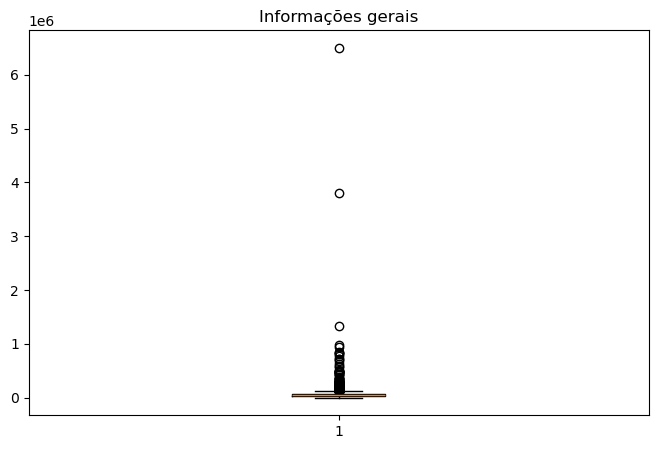

In [168]:
#Vizualisando distribuição dos dados para os KMs

fig, ax = plt.subplots(figsize=(8,5))
bplot = ax.boxplot(km)
ax.set_title('Informações gerais')
plt.savefig('boxPlot_KMs.png')
plt.show()

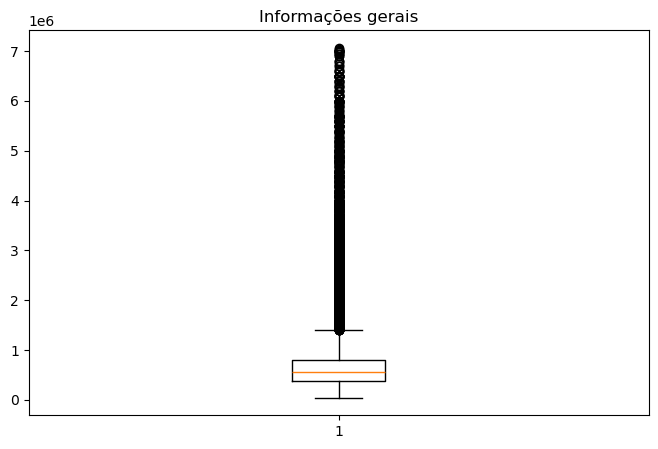

In [169]:
##Vizualisando distribuição dos dados para os preços

fig, ax = plt.subplots(figsize=(8,5))
bplot = ax.boxplot(price)
ax.set_title('Informações gerais')
plt.savefig('boxPlot_preços.png')
plt.show()

In [ ]:
#Excluindo outliers da coluna KM para um cálculo de média mais preciso

for i in range(0,3):
    ind = df.loc[df['km'] == df['km'].max()].index
    ind
    df = df.drop(ind)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32196 entries, 0 to 32199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         32196 non-null  object 
 1   model         32196 non-null  object 
 2   transmission  32196 non-null  object 
 3   age           32196 non-null  float64
 4   fuel          32196 non-null  object 
 5   km            32196 non-null  int64  
 6   price         32196 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.0+ MB


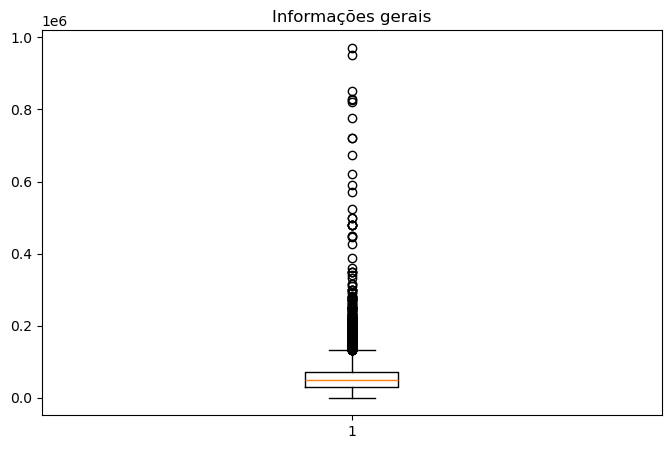

In [171]:
#Vizualisando distribuição dos dados para os KMs sem autliers extremos

km = df['km']
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Informações gerais')
bplot = ax.boxplot(km)
plt.savefig('boxPlot_KMs_sem_outliers.png')
plt.show()

In [172]:
#Calculando média de preço de venda por marca

brands = df['brand'].unique()
bMP = {}

for brand in brands:
    bMP[brand] = round(df.loc[df['brand'] == brand]['price'].mean(),2)

brandMeanPrice = pd.Series(bMP)
brandMeanPrice = brandMeanPrice.sort_values(ascending=False)

brandMeanPrice2 = brandMeanPrice[:15]
#brandMeanPrice2['outros'] = brandMeanPrice[15:].sum()

brandMeanPrice2

maserati         6100000.00
bentley          5550000.00
mercedes-amg     5100000.00
lexus            4829444.44
porsche          4457939.39
land rover       3633040.82
land             3618103.45
jaguar           2879663.14
bmw              2515021.64
volvo            2509871.74
mini             2489232.53
mercedes-benz    2447523.43
audi             2278768.14
jeep             1688935.05
mg               1587084.75
dtype: float64

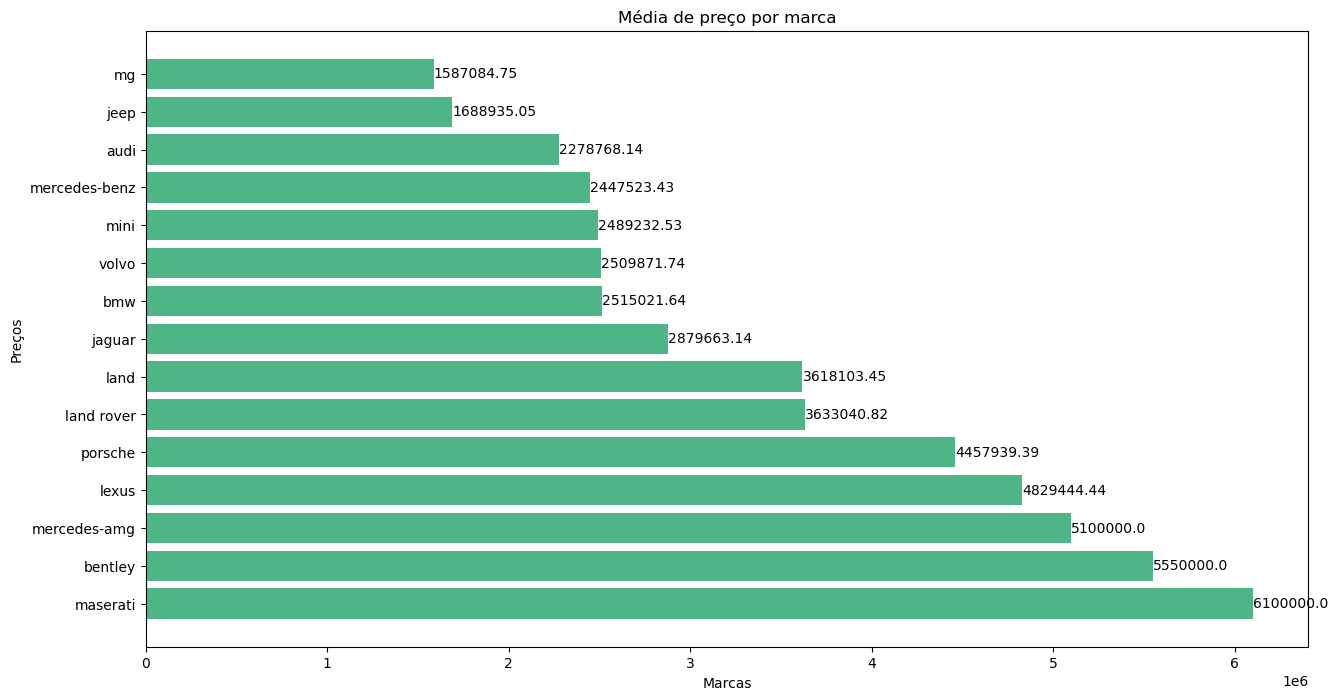

In [173]:
##Vizualisando média de preço de venda por marca

fig, ax = plt.subplots(figsize=(15,8))
bar_container = ax.barh(brandMeanPrice2.index, brandMeanPrice2.values, color='#4eb586')
ax.set_title('Média de preço por marca')
ax.set_xlabel('Marcas')
ax.set_ylabel('Preços')
ax.bar_label(bar_container,labels=brandMeanPrice2.values)
plt.savefig('Media_de_preco_por_marca.png')
plt.show()

In [174]:
#Alterando valores da coluna Transmission

df['transmission'] = np.where(df['transmission'] == 'manual', 1,0)

In [175]:
#Função para alterar valores da coluna Fuel

def fuelToNumber(f):
    if f == 'petrol':
        return 0
    
    elif f == 'diesel':
        return 1

    elif f == 'cng':
        return 2
    
    elif f == 'lpg':
        return 3
    
    else:
        return 4

In [176]:
#Alterando valores da coluna Transmission

df['fuel'] = df['fuel'].apply(fuelToNumber)

In [177]:
#Base de dados com os novos valores

df

,brand,model,transmission,age,fuel,km,price
0,mahindra,thar,1,4.0,1,11003,1231000
1,hyundai,verna,1,6.0,0,66936,786000
2,tata,harrier,1,2.0,1,27990,1489000
3,honda,city,0,1.0,0,5061,1227000
4,ford,ecosport,1,3.0,1,23480,887000
...,...,...,...,...,...,...,...
32195,datsun,redi go,1,6.0,0,11500,292000
32196,toyota,yaris,1,6.0,0,73393,534000
32197,volkswagen,ameo,1,8.0,0,83810,424000
32198,hyundai,grand i10 nios,0,5.0,0,39162,685000


In [178]:
#Calculando correlação entre as colunas

dfForCorr = df[['transmission','age','fuel','km','price']]
correlation = round(dfForCorr.corr(numeric_only=True),2)
correlation


,transmission,age,fuel,km,price
transmission,1.00,0.07,0.01,0.09,-0.48
age,0.07,1.00,0.01,0.38,-0.21
fuel,0.01,0.01,1.00,0.25,0.24
km,0.09,0.38,0.25,1.00,-0.12
price,-0.48,-0.21,0.24,-0.12,1.00


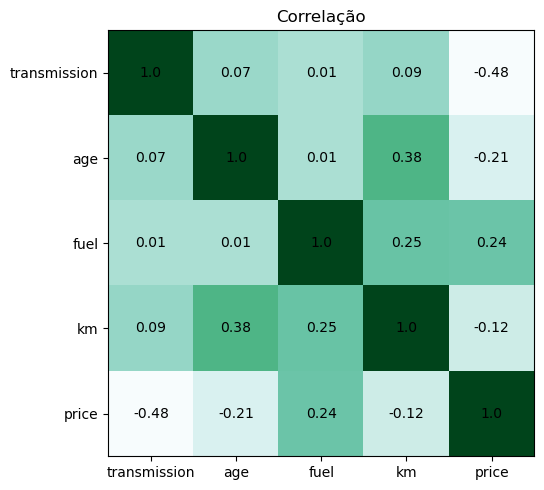

In [179]:
#Vizualisando a correlação entre as colunas

fig, ax = plt.subplots(figsize=(8,5))
im = ax.imshow(correlation, cmap="BuGn")
ax.set_xticks(np.arange(len(dfForCorr.columns)), labels=dfForCorr.columns)
ax.set_yticks(np.arange(len(dfForCorr.columns)), labels=dfForCorr.columns)
ax.set_title('Correlação')

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        text = ax.text(j, i,  correlation.values[i,j], ha='center', va='center')

plt.tight_layout()
plt.savefig('heatmap_correlaçao.png')
plt.show()